In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
loan_df = pd.read_csv("/dataset/loan-recovery.csv")
loan_df.head()

,Borrower_ID,Age,Gender,Employment_Type,Monthly_Income,Num_Dependents,Loan_ID,Loan_Amount,Loan_Tenure,Interest_Rate,...,Collateral_Value,Outstanding_Loan_Amount,Monthly_EMI,Payment_History,Num_Missed_Payments,Days_Past_Due,Recovery_Status,Collection_Attempts,Collection_Method,Legal_Action_Taken
0,BRW_1,59,Male,Salaried,215422,0,LN_1,1445796,60,12.39,...,1.727997e+06,2.914130e+05,4856.88,On-Time,0,0,Partially Recovered,1,Settlement Offer,No
1,BRW_2,49,Female,Salaried,60893,0,LN_2,1044620,12,13.47,...,1.180032e+06,6.652042e+05,55433.68,On-Time,0,0,Fully Recovered,2,Settlement Offer,No
2,BRW_3,35,Male,Salaried,116520,1,LN_3,1923410,72,7.74,...,2.622540e+06,1.031372e+06,14324.61,Delayed,2,124,Fully Recovered,2,Legal Notice,No
3,BRW_4,63,Female,Salaried,140818,2,LN_4,1811663,36,12.23,...,1.145493e+06,2.249739e+05,6249.28,On-Time,1,56,Fully Recovered,2,Calls,No
4,BRW_5,28,Male,Salaried,76272,1,LN_5,88578,48,16.13,...,0.000000e+00,3.918989e+04,816.46,On-Time,1,69,Fully Recovered,0,Debt Collectors,No


#### Explanation for Each Column :
| Kolom                         | Deskripsi                                                   |
| ----------------------------- | ----------------------------------------------------------- |
| **Borrower\_ID**              | Unique ID for each borrower                                 |
| **Age**                       | Age of the borrower                                         |
| **Gender**                    | Gender of the borrower                                      |
| **Employment\_Type**          | Type of employment (Salaried/Self-Employed/Bussiness Owner)                 |
| **Monthly\_Income**           | Monthly earnings of the borrower                            |
| **Num\_Dependents**           | Number of dependents (family members financially dependent) |
| **Loan\_ID**                  | Unique loan identifier                                      |
| **Loan\_Amount**              | Total amount borrowed                                       |
| **Loan\_Tenure**              | Loan period (months/years)                                  |
| **Interest\_Rate**            | Interest rate on the loan                                   |
| **Loan\_Type**                | Type of loan (Personal, Home, Auto, etc.)                   |
| **Collateral\_Value**         | Value of any collateral provided for secured loans          |
| **Outstanding\_Loan\_Amount** | Remaining loan balance                                      |
| **Monthly\_EMI**              | Fixed monthly installment for loan repayment                |
| **Payment\_History**          | Past payment history (On-Time/Delayed)                      |
| **Num\_Missed\_Payments**     | Number of missed EMI payments                               |
| **Days\_Past\_Due**           | Number of days loan payments are overdue                    |
| **Recovery\_Status**          | Fully recovered, Partially recovered, Writes-off            |
| **Collection\_Attempts**      | Number of times the bank attempted recovery                 |
| **Collection\_Method**        | Mode of recovery (Phone Call, Visit, Legal Notice)          |
| **Legal\_Action\_Taken**      | Whether legal action was taken (Yes/No)                     |

In [3]:
loan_df.dtypes

Borrower_ID                 object
Age                          int64
Gender                      object
Employment_Type             object
Monthly_Income               int64
Num_Dependents               int64
Loan_ID                     object
Loan_Amount                  int64
Loan_Tenure                  int64
Interest_Rate              float64
Loan_Type                   object
Collateral_Value           float64
Outstanding_Loan_Amount    float64
Monthly_EMI                float64
Payment_History             object
Num_Missed_Payments          int64
Days_Past_Due                int64
Recovery_Status             object
Collection_Attempts          int64
Collection_Method           object
Legal_Action_Taken          object
dtype: object

#### Insights :
Tidak ada dtype yang salah pada kolom

In [20]:
missing_pct = round(loan_df.isnull().sum())
print(missing_pct)

Borrower_ID                0
Age                        0
Gender                     0
Employment_Type            0
Monthly_Income             0
Num_Dependents             0
Loan_ID                    0
Loan_Amount                0
Loan_Tenure                0
Interest_Rate              0
Loan_Type                  0
Collateral_Value           0
Outstanding_Loan_Amount    0
Monthly_EMI                0
Payment_History            0
Num_Missed_Payments        0
Days_Past_Due              0
Recovery_Status            0
Collection_Attempts        0
Collection_Method          0
Legal_Action_Taken         0
dtype: int64


#### Insights :
Tidak ada missing data

In [12]:
loan_df.describe()

,Age,Monthly_Income,Num_Dependents,Loan_Amount,Loan_Tenure,Interest_Rate,Collateral_Value,Outstanding_Loan_Amount,Monthly_EMI,Num_Missed_Payments,Days_Past_Due,Collection_Attempts
count,500.000000,500.000000,500.000000,5.000000e+02,500.00000,500.000000,5.000000e+02,5.000000e+02,500.000000,500.000000,500.000000,500.000000
mean,43.116000,134829.920000,1.476000,1.024907e+06,46.10400,11.192820,6.032240e+05,5.627260e+05,15861.536020,1.912000,70.678000,3.000000
std,12.733217,68969.356746,1.145447,5.907556e+05,18.23706,3.775209,7.457131e+05,4.723581e+05,18709.231315,2.110252,60.211038,2.807805
min,21.000000,15207.000000,0.000000,5.413800e+04,12.00000,5.020000,0.000000e+00,1.571283e+04,261.880000,0.000000,0.000000,0.000000
25%,32.000000,76343.250000,0.000000,4.629848e+05,36.00000,7.907500,0.000000e+00,1.822072e+05,4039.097500,1.000000,4.000000,1.000000
50%,44.000000,134929.500000,1.000000,9.971240e+05,48.00000,10.915000,2.327684e+05,4.133240e+05,9330.170000,2.000000,66.500000,2.000000
75%,53.000000,193086.250000,3.000000,1.557952e+06,60.00000,14.577500,1.111106e+06,8.324787e+05,20439.485000,3.000000,122.250000,4.000000
max,64.000000,249746.000000,3.000000,1.995325e+06,72.00000,17.970000,2.744395e+06,1.932396e+06,127849.230000,12.000000,180.000000,10.000000


### Handling Outlier

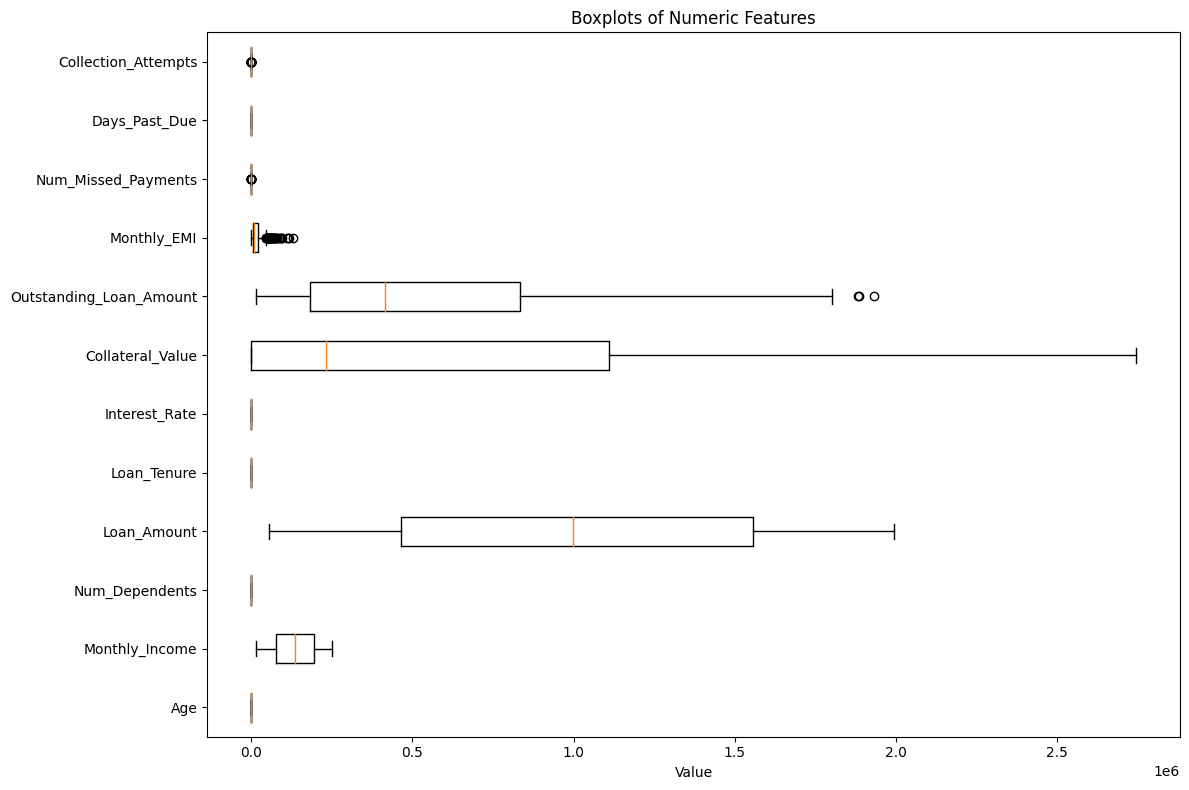

In [7]:
# Pick only the numeric columns
numeric_cols = loan_df.select_dtypes(include = "number").columns
# Extract their values as a 2D array (shape: n_columns x n_samples)
data = [loan_df[col].dropna().values for col in numeric_cols]
# Plot
plt.figure(figsize=(12, 8))
plt.boxplot(data, vert=False, labels=numeric_cols)
plt.title("Boxplots of Numeric Features")
plt.xlabel("Value")
plt.tight_layout()
plt.show()

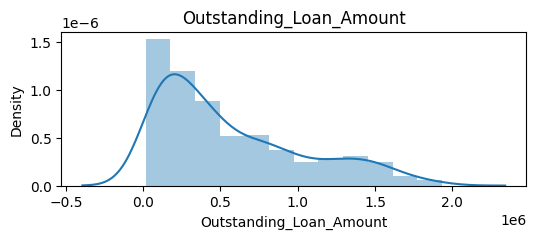

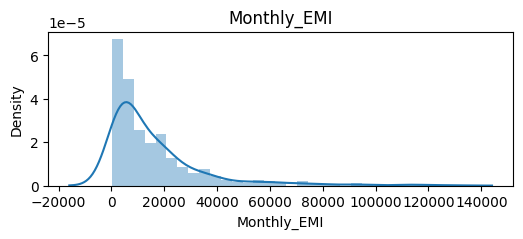

In [55]:
plt.figure(figsize=(6,2))
sns.distplot(loan_df['Outstanding_Loan_Amount'])
plt.title('Outstanding_Loan_Amount')
plt.show()
plt.figure(figsize=(6,2))
sns.distplot(loan_df['Monthly_EMI'])
plt.title('Monthly_EMI')
plt.show()

In [45]:
import numpy as np
import pandas as pd
from scipy import stats
# Metode IQR
Q1 = df['Outstanding_Loan_Amount'].quantile(0.25)
Q3 = df['Outstanding_Loan_Amount'].quantile(0.75)
IQR = Q3 - Q1
lower, upper = Q1 - 1.5*IQR, Q3 + 1.5*IQR
outlier_iqr = df[(df['Outstanding_Loan_Amount'] < lower) |
                 (df['Outstanding_Loan_Amount'] > upper)]
# Tampilkan beberapa kolom kunci saja
cols = ['Monthly_Income','Outstanding_Loan_Amount','Monthly_EMI','Loan_Tenure','Interest_Rate','Employment_Type','Recovery_Status']

# Print outlier teratas
display(outlier_iqr[cols].sort_values('Outstanding_Loan_Amount', ascending=False).head())

,Monthly_Income,Outstanding_Loan_Amount,Monthly_EMI,Loan_Tenure,Interest_Rate,Employment_Type,Recovery_Status
345,72993,1.932396e+06,40258.25,48,6.37,Self-Employed,Fully Recovered
209,46348,1.886640e+06,31444.00,60,6.19,Salaried,Fully Recovered
392,87240,1.880951e+06,39186.48,48,17.27,Business Owner,Fully Recovered


#### Insights : 
Self‑Employed atau Business Owner sering mengajukan pinjaman modal kerja jutaan rupiah untuk pembelian stok, peralatan, atau ekspansi. Nilai outstanding besar mencerminkan kebutuhan modal riil, bukan konsumsi pribadi. Oleh karena itu outlier ini adalah Valid

In [44]:
import numpy as np
import pandas as pd
from scipy import stats
# Metode IQR
Q1 = df['Monthly_EMI'].quantile(0.25)
Q3 = df['Monthly_EMI'].quantile(0.75)
IQR = Q3 - Q1
lower, upper = Q1 - 1.5*IQR, Q3 + 1.5*IQR
outlier_iqr = df[(df['Monthly_EMI'] < lower) |
                 (df['Monthly_EMI'] > upper)]
# Tampilkan beberapa kolom kunci saja
cols = ['Monthly_Income','Outstanding_Loan_Amount','Monthly_EMI','Loan_Tenure','Interest_Rate','Employment_Type','Recovery_Status']
# Print outlier teratas
display(outlier_iqr[cols].sort_values('Monthly_EMI', ascending=False).head())

,Monthly_Income,Outstanding_Loan_Amount,Monthly_EMI,Loan_Tenure,Interest_Rate,Employment_Type,Recovery_Status
140,224988,1.534191e+06,127849.23,12,15.32,Salaried,Partially Recovered
291,86031,1.397196e+06,116433.04,12,5.80,Salaried,Fully Recovered
349,22421,1.372451e+06,114370.94,12,6.07,Salaried,Partially Recovered
192,108680,1.315302e+06,109608.52,12,5.38,Salaried,Partially Recovered
28,152348,1.155409e+06,96284.05,12,9.42,Salaried,Fully Recovered


#### Insights
Semua outlier di atas memiliki Tenor yang sangat pendek yaitu 12 bulan (Loan_Tenure = 12). Pokok pinjaman dibagi 12 sudah benar‑benar tinggi (Rp 1,3–1,5 juta ÷ 12 ≈ Rp 96–128 ribu) belum lagi ditambah bunga membuat cicilan bulanan semakin besar. Jadi nilai EMI tinggi bukan kesalahan, melainkan konsekuensi logis dari jangka waktu yang sangat singkat. Oleh karena itu Outlier ini valid

##### Karena outlier valid maka diputuskan untuk hanya melakukan transformasi log untuk meratakan distribusi fitur tersebut

In [65]:
import numpy as np
loan_df['Outstanding_Loan_Amount'] = np.log1p(loan_df['Outstanding_Loan_Amount'])
loan_df['Monthly_EMI'] = np.log1p(loan_df['Monthly_EMI'])
loan_df.head()

,Borrower_ID,Age,Gender,Employment_Type,Monthly_Income,Num_Dependents,Loan_ID,Loan_Amount,Loan_Tenure,Interest_Rate,...,Collateral_Value,Outstanding_Loan_Amount,Monthly_EMI,Payment_History,Num_Missed_Payments,Days_Past_Due,Recovery_Status,Collection_Attempts,Collection_Method,Legal_Action_Taken
0,BRW_1,59,Male,Salaried,215422,0,LN_1,1445796,60,12.39,...,1.727997e+06,12.582500,8.488357,On-Time,0,0,Partially Recovered,1,Settlement Offer,No
1,BRW_2,49,Female,Salaried,60893,0,LN_2,1044620,12,13.47,...,1.180032e+06,13.407851,10.922961,On-Time,0,0,Fully Recovered,2,Settlement Offer,No
2,BRW_3,35,Male,Salaried,116520,1,LN_3,1923410,72,7.74,...,2.622540e+06,13.846401,9.569804,Delayed,2,124,Fully Recovered,2,Legal Notice,No
3,BRW_4,63,Female,Salaried,140818,2,LN_4,1811663,36,12.23,...,1.145493e+06,12.323744,8.740382,On-Time,1,56,Fully Recovered,2,Calls,No
4,BRW_5,28,Male,Salaried,76272,1,LN_5,88578,48,16.13,...,0.000000e+00,10.576200,6.706202,On-Time,1,69,Fully Recovered,0,Debt Collectors,No


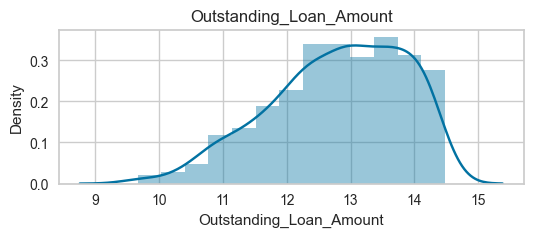

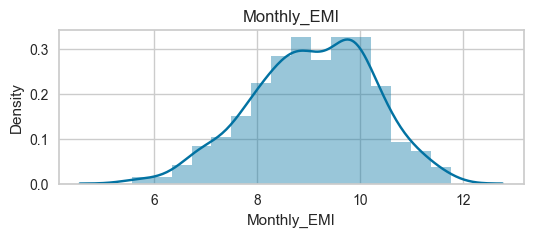

In [66]:
plt.figure(figsize=(6,2))
sns.distplot(loan_df['Outstanding_Loan_Amount'])
plt.title('Outstanding_Loan_Amount')
plt.show()
plt.figure(figsize=(6,2))
sns.distplot(loan_df['Monthly_EMI'])
plt.title('Monthly_EMI')
plt.show()

In [67]:
#Drop kolom-kolom non informatif
loan_df = loan_df.drop(columns=["Borrower_ID","Loan_ID"])
loan_df.head()

,Age,Gender,Employment_Type,Monthly_Income,Num_Dependents,Loan_Amount,Loan_Tenure,Interest_Rate,Loan_Type,Collateral_Value,Outstanding_Loan_Amount,Monthly_EMI,Payment_History,Num_Missed_Payments,Days_Past_Due,Recovery_Status,Collection_Attempts,Collection_Method,Legal_Action_Taken
0,59,Male,Salaried,215422,0,1445796,60,12.39,Home,1.727997e+06,12.582500,8.488357,On-Time,0,0,Partially Recovered,1,Settlement Offer,No
1,49,Female,Salaried,60893,0,1044620,12,13.47,Auto,1.180032e+06,13.407851,10.922961,On-Time,0,0,Fully Recovered,2,Settlement Offer,No
2,35,Male,Salaried,116520,1,1923410,72,7.74,Home,2.622540e+06,13.846401,9.569804,Delayed,2,124,Fully Recovered,2,Legal Notice,No
3,63,Female,Salaried,140818,2,1811663,36,12.23,Home,1.145493e+06,12.323744,8.740382,On-Time,1,56,Fully Recovered,2,Calls,No
4,28,Male,Salaried,76272,1,88578,48,16.13,Personal,0.000000e+00,10.576200,6.706202,On-Time,1,69,Fully Recovered,0,Debt Collectors,No


### Exploratory Data Analysis

#### Analyzing Payment History

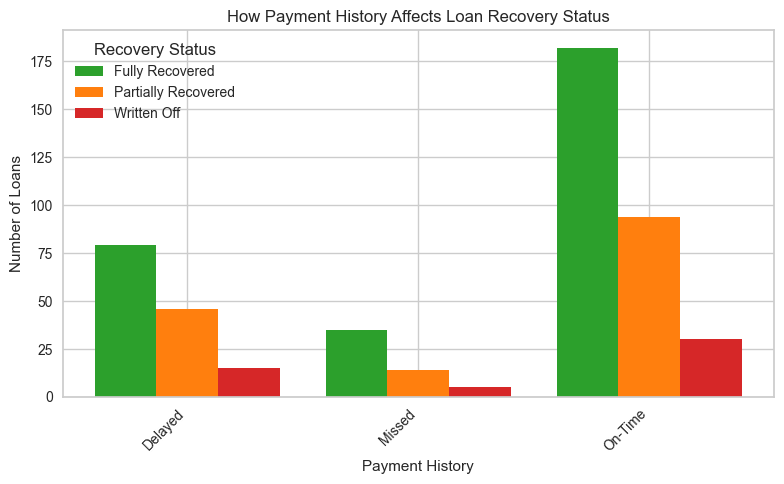

In [88]:
import matplotlib.pyplot as plt
import numpy as np

counts = (
    loan_df
    .groupby(['Payment_History', 'Recovery_Status'])
    .size()
    .unstack(fill_value=0)
)

color_map = {
    'Fully Recovered':     '#2ca02c',   # green
    'Partially Recovered': '#ff7f0e',   # orange
    'Written Off':         '#d62728'    # red
}

statuses   = counts.columns.tolist()  
categories = counts.index.tolist()     
n_cat      = len(categories)
n_stat     = len(statuses)
bar_width  = 0.8 / n_stat   # total width 0.8, split among statuses
x          = np.arange(n_cat)

fig, ax = plt.subplots(figsize=(8, 5))
for i, status in enumerate(statuses):
    ax.bar(
        x + i * bar_width,
        counts[status],
        width=bar_width,
        label=status,
        color=color_map.get(status, 'gray')  # fallback if new status appears
    )

ax.set_xticks(x + bar_width * (n_stat-1)/2)
ax.set_xticklabels(categories, rotation=45, ha='right')
ax.set_xlabel("Payment History")
ax.set_ylabel("Number of Loans")
ax.set_title("How Payment History Affects Loan Recovery Status")
ax.legend(title="Recovery Status")
plt.tight_layout()
plt.show()

##### Insights : 
Loans with on-time payments are mostly fully recovered. Delayed payments result in a mix of partial and full recoveries, with some written off. Missed payments have a significantly lower recovery rate, with most loans ending up either partially recovered or written off.

#### Analyzing Loan Recovery Based on Monthly Income & Loan Amounts

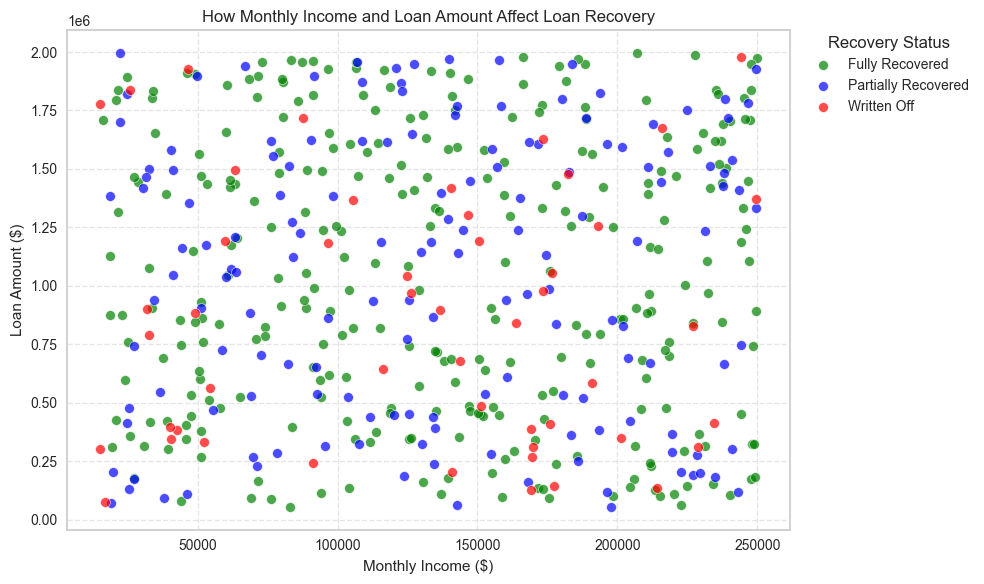

In [94]:
import matplotlib.pyplot as plt
# Palet baru yang lebih gelap
dark_color_map = {
    'Fully Recovered':     'green',   # hijau
    'Partially Recovered': 'blue',    # biru
    'Written Off':         'red'      # merah
}
fig, ax = plt.subplots(figsize=(10, 6))
uniform_size = 50
for status, color in dark_color_map.items():
    subset = loan_df[loan_df['Recovery_Status'] == status]
    ax.scatter(
        subset['Monthly_Income'],
        subset['Loan_Amount'],
        s=uniform_size,
        c=color,
        label=status,
        alpha=0.7,                # sedikit lebih pekat
        edgecolors='w',
        linewidth=0.5
    )
ax.set_xlabel("Monthly Income ($)")
ax.set_ylabel("Loan Amount ($)")
ax.set_title("How Monthly Income and Loan Amount Affect Loan Recovery")
ax.grid(True, linestyle='--', alpha=0.5)
# Pindahkan legend ke luar plot di sebelah kanan atas
ax.legend(
    title="Recovery Status",
    loc='upper left',
    bbox_to_anchor=(1.02, 1),
    borderaxespad=0,
    frameon=False
)
# Beri ruang ekstra di kanan agar legend muat
plt.subplots_adjust(right=0.8)
plt.tight_layout()
plt.show()

##### Insights :
Higher-income individuals are more likely to fully recover their loans, even for larger amounts. Borrowers in lower income brackets face a higher likelihood of loan write-offs or partial recovery. This trend highlights the impact of income on loan recovery, as higher earnings lead to better repayment outcomes and fewer write-offs, even for substantial loans.

### Make Borrower Segment based on Monthly Income & Loan Amounts using K-Means Clustering

In [120]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from yellowbrick.cluster import KElbowVisualizer
important_features = ['Monthly_Income', 'Loan_Amount']
scaler = MinMaxScaler()
important_features_scaled = scaler.fit_transform(loan_df[important_features])

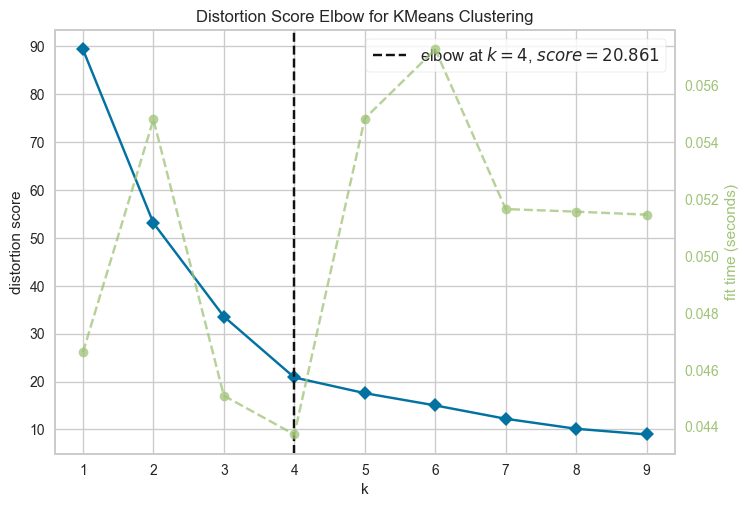

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [121]:
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(1,10))
visualizer.fit(important_features_scaled)
visualizer.show()

In [113]:
from sklearn.metrics import silhouette_score
# Menggunakan algoritma K-Means Clustering
model_kmeans = KMeans(n_clusters = 4, random_state = 42, n_init=10)
model_kmeans.fit(important_features_scaled)
silhouette_avg = silhouette_score(important_features_scaled, model_kmeans.labels_)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.4267092517666947


In [114]:
#Store the cluster
loan_df['Cluster'] = model_kmeans.labels_
loan_df.head()

,Age,Gender,Employment_Type,Monthly_Income,Num_Dependents,Loan_Amount,Loan_Tenure,Interest_Rate,Loan_Type,Collateral_Value,...,Payment_History,Num_Missed_Payments,Days_Past_Due,Recovery_Status,Collection_Attempts,Collection_Method,Legal_Action_Taken,Cluster,Cluster_Name,High_Risk_Flag
0,59,Male,Salaried,215422,0,1445796,60,12.39,Home,1.727997e+06,...,On-Time,0,0,Partially Recovered,1,Settlement Offer,No,2,Low-Moderate Risk,0
1,49,Female,Salaried,60893,0,1044620,12,13.47,Auto,1.180032e+06,...,On-Time,0,0,Fully Recovered,2,Settlement Offer,No,3,Moderate-High Risk,1
2,35,Male,Salaried,116520,1,1923410,72,7.74,Home,2.622540e+06,...,Delayed,2,124,Fully Recovered,2,Legal Notice,No,1,High Risk,1
3,63,Female,Salaried,140818,2,1811663,36,12.23,Home,1.145493e+06,...,On-Time,1,56,Fully Recovered,2,Calls,No,1,High Risk,1
4,28,Male,Salaried,76272,1,88578,48,16.13,Personal,0.000000e+00,...,On-Time,1,69,Fully Recovered,0,Debt Collectors,No,3,Moderate-High Risk,1


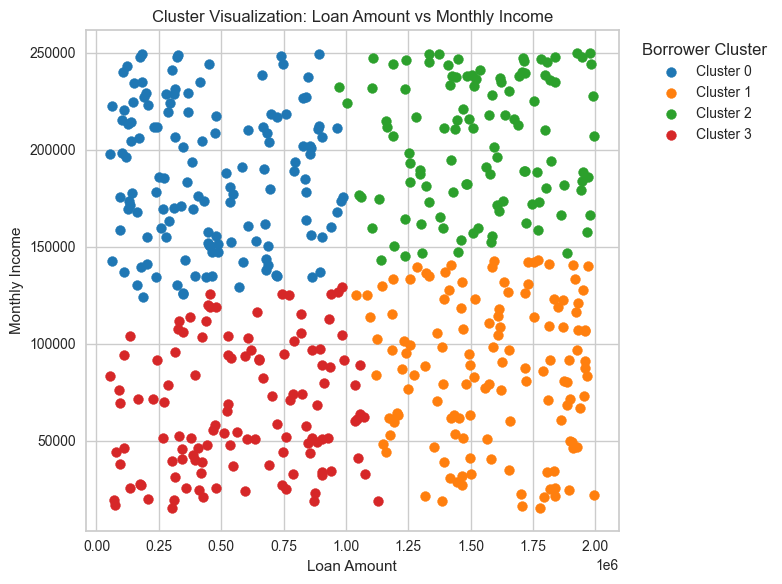

In [115]:
# Ambil data asli dan label klaster
loan_amt   = loan_df['Loan_Amount']
monthly_inc = loan_df['Monthly_Income']
clusters    = loan_df['Cluster']
# Tentukan sebuah colormap (di sini “tab10” cukup untuk sampai 10 klaster)
cmap = plt.get_cmap('tab10')
plt.figure(figsize=(8,6))
for cluster_id in sorted(clusters.unique()):
    mask = clusters == cluster_id
    plt.scatter(
        loan_amt[mask],
        monthly_inc[mask],
        s=50,
        color=cmap(cluster_id),
        label=f'Cluster {cluster_id}'
    )
plt.xlabel('Loan Amount')
plt.ylabel('Monthly Income')
plt.title('Cluster Visualization: Loan Amount vs Monthly Income')
# Pindahkan legend ke kanan luar plot
plt.legend(
    title='Borrower Cluster',
    loc='upper left',                # posisi referensi legend
    bbox_to_anchor=(1.02, 1)         # (x, y) relatif terhadap axes; x>1 artinya di luar kanan
)
plt.grid(True)
plt.tight_layout()  # agar ruang untuk legend tidak terpotong
plt.show()

#### Deskripsi Cluster 
**Cluster 0 (Low Default Risk)**
- Karekteristik : Loan Amount rendah & Monthly Income tinggi
- Penjelasan : Rasio DTI (debt‑to‑income) sangat kecil ⇒ Kemampuan bayar tinggi ⇒ Potensi default paling rendah

**Cluster 1 (High Default Risk)**
- Karakteristik : Loan Amount tinggi & Monthly Income rendah
- Penjelasan : DTI sangat tinggi ⇒ Beban cicilan besar dibanding pendapatan ⇒ Potensi default paling tinggi

**Cluster 2 (Low-Moderate Default Risk)**
- Karakteristik : Loan Amount tinggi & Monthly Income tinggi
- Penjelasan : Meski pinjaman besar, pendapatan juga tinggi ⇒ Rasio DTI (debt‑to‑income) sedang ⇒ Masih relatif aman, namun perlu monitoring

**Cluster 3 (Moderate–High Default Risk)**
- Karekteristik : Loan Amount rendah & Monthly Income rendah
- Penjelasan : Pinjaman kecil tapi pendapatan juga terbatas ⇒ Rasio DTI (debt‑to‑income) menengah ke tinggi ⇒ Bisa susah bayar jika situasi keuangan memburuk

In [73]:
#Buat kolom baru untuk menyimpan informasi kategori cluster
loan_df['Cluster_Name'] = loan_df['Cluster'].map({
    0: 'Low Risk',
    1: 'High Risk',
    2: 'Low-Moderate Risk',
    3: 'Moderate-High Risk'
})
loan_df.head()

,Age,Gender,Employment_Type,Monthly_Income,Num_Dependents,Loan_Amount,Loan_Tenure,Interest_Rate,Loan_Type,Collateral_Value,...,Monthly_EMI,Payment_History,Num_Missed_Payments,Days_Past_Due,Recovery_Status,Collection_Attempts,Collection_Method,Legal_Action_Taken,Cluster,Cluster_Name
0,59,Male,Salaried,215422,0,1445796,60,12.39,Home,1.727997e+06,...,8.488357,On-Time,0,0,Partially Recovered,1,Settlement Offer,No,2,Low-Moderate Risk
1,49,Female,Salaried,60893,0,1044620,12,13.47,Auto,1.180032e+06,...,10.922961,On-Time,0,0,Fully Recovered,2,Settlement Offer,No,3,Moderate-High Risk
2,35,Male,Salaried,116520,1,1923410,72,7.74,Home,2.622540e+06,...,9.569804,Delayed,2,124,Fully Recovered,2,Legal Notice,No,1,High Risk
3,63,Female,Salaried,140818,2,1811663,36,12.23,Home,1.145493e+06,...,8.740382,On-Time,1,56,Fully Recovered,2,Calls,No,1,High Risk
4,28,Male,Salaried,76272,1,88578,48,16.13,Personal,0.000000e+00,...,6.706202,On-Time,1,69,Fully Recovered,0,Debt Collectors,No,3,Moderate-High Risk


### Building an Early Detection System for Loan Defaults based on the Default Risk Scores

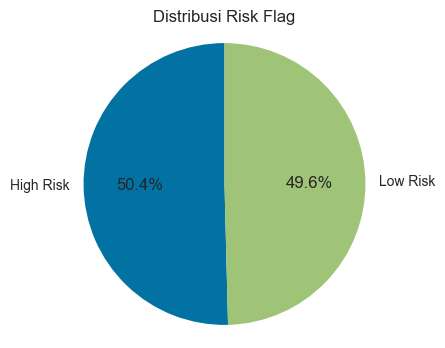

In [177]:
import matplotlib.pyplot as plt

#High_Risk_Flag sebagai class/target variable
loan_df['High_Risk_Flag'] = loan_df['Cluster_Name'].apply(lambda x: 1 if x in ['Moderate-High Risk', 'High Risk'] else 0)

#Visualisasi distribusi class
counts = loan_df['High_Risk_Flag'].value_counts()
labels = ['Low Risk' if v==0 else 'High Risk' for v in counts.index]
plt.figure(figsize=(4, 4))
plt.pie(
    counts.values,
    labels=labels,
    autopct='%1.1f%%',   
    startangle=90  
)
plt.title('Distribusi Risk Flag')
plt.axis('equal')
plt.show()

In [173]:
#Select feature & target variable
X = loan_df.drop(columns=["Recovery_Status", "Collection_Attempts", "Collection_Method", "Legal_Action_Taken", "High_Risk_Flag", "Cluster",	"Cluster_Name"])
y = loan_df['High_Risk_Flag']
X.head()

,Age,Gender,Employment_Type,Monthly_Income,Num_Dependents,Loan_Amount,Loan_Tenure,Interest_Rate,Loan_Type,Collateral_Value,Outstanding_Loan_Amount,Monthly_EMI,Payment_History,Num_Missed_Payments,Days_Past_Due
0,59,Male,Salaried,215422,0,1445796,60,12.39,Home,1.727997e+06,12.582500,8.488357,On-Time,0,0
1,49,Female,Salaried,60893,0,1044620,12,13.47,Auto,1.180032e+06,13.407851,10.922961,On-Time,0,0
2,35,Male,Salaried,116520,1,1923410,72,7.74,Home,2.622540e+06,13.846401,9.569804,Delayed,2,124
3,63,Female,Salaried,140818,2,1811663,36,12.23,Home,1.145493e+06,12.323744,8.740382,On-Time,1,56
4,28,Male,Salaried,76272,1,88578,48,16.13,Personal,0.000000e+00,10.576200,6.706202,On-Time,1,69


#### Train-Test Split

In [148]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#### Feature Scaling & Encoding Fitur Kategori

In [149]:
#Numeric Feature Scaling
from sklearn.preprocessing import MinMaxScaler
X_train_num = X_train.select_dtypes(include=['number'])
X_test_num = X_test.select_dtypes(include=['number'])
scaler = MinMaxScaler()
X_train_num_scaled = scaler.fit_transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)

import pandas as pd
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder

# 1. Pisahkan fitur numerik dan skalakan
X_train_num = X_train.select_dtypes(include=['number'])
X_test_num  = X_test.select_dtypes(include=['number'])

scaler = MinMaxScaler()
X_train_num_scaled = scaler.fit_transform(X_train_num)
X_test_num_scaled  = scaler.transform(X_test_num)

# Konversi kembali ke DataFrame, pertahankan nama kolom dan index
df_train_num_scaled = pd.DataFrame(
    X_train_num_scaled,
    columns=X_train_num.columns,
    index=X_train.index
)
df_test_num_scaled = pd.DataFrame(
    X_test_num_scaled,
    columns=X_test_num.columns,
    index=X_test.index
)

In [151]:
#Encoding Categorical Feature
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

le = LabelEncoder()
# Buat kolom baru 'Gender_enc' agar kolom asli tetap tersisa kalau butuh
df_train_num_scaled['Gender_enc'] = le.fit_transform(X_train['Gender'])
df_test_num_scaled ['Gender_enc'] = le.transform(X_test ['Gender'])

# 3. One‑Hot‑Encode kategori selain 'Gender'
cat_cols = X_train.select_dtypes(include=['object']).columns.tolist()
ohe_cols  = [c for c in cat_cols if c != 'Gender']
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')
X_train_ohe = ohe.fit_transform(X_train[ohe_cols])
X_test_ohe  = ohe.transform(   X_test[ohe_cols])

ohe_names = ohe.get_feature_names_out(ohe_cols)
df_train_ohe = pd.DataFrame(X_train_ohe, columns=ohe_names, index=X_train.index)
df_test_ohe  = pd.DataFrame(X_test_ohe,  columns=ohe_names, index=X_test.index)

# 4. Gabungkan semua menjadi satu DataFrame siap modeling
X_train_scaled = pd.concat([df_train_num_scaled, df_train_ohe], axis=1)
X_test_scaled  = pd.concat([df_test_num_scaled,  df_test_ohe ], axis=1)

# Cek struktur hasil
print(X_train_scaled.shape)
X_train_scaled.columns

(400, 22)


Index(['Age', 'Monthly_Income', 'Num_Dependents', 'Loan_Amount', 'Loan_Tenure',
       'Interest_Rate', 'Collateral_Value', 'Outstanding_Loan_Amount',
       'Monthly_EMI', 'Num_Missed_Payments', 'Days_Past_Due', 'Gender_enc',
       'Employment_Type_Business Owner', 'Employment_Type_Salaried',
       'Employment_Type_Self-Employed', 'Loan_Type_Auto', 'Loan_Type_Business',
       'Loan_Type_Home', 'Loan_Type_Personal', 'Payment_History_Delayed',
       'Payment_History_Missed', 'Payment_History_On-Time'],
      dtype='object')

#### Feature Selection

In [152]:
#VARIANCE THRESHOLDING
from sklearn.feature_selection import VarianceThreshold
X_train_scaled_num = X_train_scaled[['Age', 'Monthly_Income', 'Num_Dependents', 'Loan_Amount', 'Loan_Tenure',
       'Interest_Rate', 'Collateral_Value', 'Outstanding_Loan_Amount',
       'Monthly_EMI', 'Num_Missed_Payments', 'Days_Past_Due']]
# Fit VarianceThreshold pada df_numeric
var_thres = VarianceThreshold(threshold=0)
var_thres.fit(X_train_scaled_num)
# Lihat mana yang lolos
mask = var_thres.get_support()    
selected_numeric_cols = X_train_scaled_num.columns[mask].tolist()
dropped_numeric_cols  = X_train_scaled_num.columns[~mask].tolist()
print("Column with Variance = 0):", dropped_numeric_cols)

Column with Variance = 0): []


In [153]:
# Select Highly Correlated Features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # Select the first feature that is correlated with any other feature, that has correlation score above threshold
                colname = corr_matrix.columns[i]  # Getting the name of column
                col_corr.add(colname)
    return col_corr
corr_features = correlation(X_train_scaled_num, 0.7)
print('Selected Highly Corraleted Features : ', corr_features)

Selected Highly Corraleted Features :  {'Outstanding_Loan_Amount', 'Monthly_EMI'}


In [154]:
#Drop highly correlated features ('Outstanding_Loan_Amount' & 'Monthly_EMI')'
X_train_scaled = X_train_scaled.drop(columns=['Outstanding_Loan_Amount', 'Monthly_EMI'])
X_test_scaled = X_test_scaled.drop(columns=['Outstanding_Loan_Amount', 'Monthly_EMI'])
X_train_scaled.head()

,Age,Monthly_Income,Num_Dependents,Loan_Amount,Loan_Tenure,Interest_Rate,Collateral_Value,Num_Missed_Payments,Days_Past_Due,Gender_enc,Employment_Type_Business Owner,Employment_Type_Salaried,Employment_Type_Self-Employed,Loan_Type_Auto,Loan_Type_Business,Loan_Type_Home,Loan_Type_Personal,Payment_History_Delayed,Payment_History_Missed,Payment_History_On-Time
163,0.674419,0.285424,0.0,0.314849,0.4,0.249421,0.000000,0.000000,0.000000,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
323,0.116279,0.278933,1.0,0.936823,0.2,0.548263,0.818648,0.000000,0.000000,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
32,0.348837,0.463076,0.0,0.068674,0.8,0.346718,0.000000,0.000000,0.000000,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
474,0.976744,0.761969,0.0,0.911057,0.8,0.147490,0.000000,0.000000,0.000000,1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
24,0.744186,0.325584,1.0,0.482160,1.0,0.600772,0.000000,0.166667,0.755556,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


#### Building Model to Predict Default Risk Score

DecisionTree: best_params={'max_depth': 3, 'min_samples_split': 2}, CV-ROC AUC=0.9874
RandomForest: best_params={'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}, CV-ROC AUC=0.9939
Selected Best Model: RandomForest
              precision    recall  f1-score   support

    Low Risk       0.94      0.98      0.96        50
   High Risk       0.98      0.94      0.96        50

    accuracy                           0.96       100
   macro avg       0.96      0.96      0.96       100
weighted avg       0.96      0.96      0.96       100



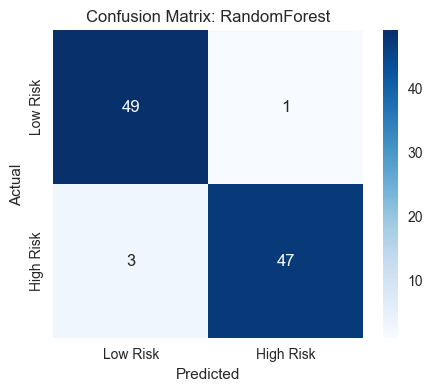

In [179]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

models = {
    'DecisionTree': {
        'estimator': DecisionTreeClassifier(random_state=42),
        'param_grid': {
            'max_depth': [3, 5, 7, None],
            'min_samples_split': [2, 5, 10]
        }
    },
    'RandomForest': {
        'estimator': RandomForestClassifier(random_state=42),
        'param_grid': {
            'n_estimators': [50, 100, 200],
            'max_depth': [5, 10, None],
            'min_samples_split': [2, 5]
        }
    }
}

best_models = {}
best_scores = {}
for name, info in models.items():
    gs = GridSearchCV(
        estimator  = info['estimator'],
        param_grid = info['param_grid'],
        scoring    = 'roc_auc',
        cv         = 5,
        n_jobs     = -1
    )
    gs.fit(X_train_scaled, y_train)
    best_models[name] = gs.best_estimator_
    best_scores[name] = gs.best_score_
    print(f"{name}: best_params={gs.best_params_}, CV-ROC AUC={gs.best_score_:.4f}")

best_name = max(best_scores, key=best_scores.get)
best_estimator  = best_models[best_name]
print(f"Selected Best Model: {best_name}")

# Evaluasi
y_pred = best_estimator.predict(X_test_scaled)
print(classification_report(y_test, y_pred, target_names=['Low Risk','High Risk']))
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Low Risk','High Risk'],
            yticklabels=['Low Risk','High Risk'])
plt.title(f'Confusion Matrix: {best_name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [178]:
#Feature importances dari Model
importances = pd.Series(best_estimator.feature_importances_, index=X_train_scaled.columns).sort_values(ascending=False)
print("\nFeature importances of", best_name)
print(importances)


Feature importances of RandomForest
Monthly_Income                    0.670885
Loan_Amount                       0.065931
Interest_Rate                     0.053760
Days_Past_Due                     0.037366
Age                               0.035441
Collateral_Value                  0.026098
Loan_Tenure                       0.020494
Num_Dependents                    0.017326
Num_Missed_Payments               0.015503
Loan_Type_Auto                    0.006726
Employment_Type_Self-Employed     0.006660
Employment_Type_Salaried          0.005895
Gender_enc                        0.005764
Payment_History_Delayed           0.005469
Payment_History_On-Time           0.005168
Loan_Type_Home                    0.005154
Loan_Type_Business                0.005083
Employment_Type_Business Owner    0.004584
Loan_Type_Personal                0.004279
Payment_History_Missed            0.002412
dtype: float64


#### Store The Risk Score Prediction Result

In [167]:
# Get risk scores (probability of being high risk)
risk_scores = best_estimator.predict_proba(X_test_scaled)[:, 1]  # probability of high risk
# add risk scores and flags to test data
loan_df_test = X_test.copy()
loan_df_test['Default_Risk_Score'] = risk_scores
loan_df_test['Predicted_High_Risk'] = (loan_df_test['Default_Risk_Score'] > 0.5).astype(int)  # Threshold at 50% probability
# merging with borrower details
loan_df_clustered_test = loan_df_test.merge(loan_df[['Cluster_Name', 'Recovery_Status', 'Collection_Method', 'Collection_Attempts', 'Legal_Action_Taken']],
                        left_index=True, right_index=True)
loan_df_clustered_test.head()

,Age,Gender,Employment_Type,Monthly_Income,Num_Dependents,Loan_Amount,Loan_Tenure,Interest_Rate,Loan_Type,Collateral_Value,...,Payment_History,Num_Missed_Payments,Days_Past_Due,Default_Risk_Score,Predicted_High_Risk,Cluster_Name,Recovery_Status,Collection_Method,Collection_Attempts,Legal_Action_Taken
182,64,Female,Salaried,141969,3,1729328,48,16.69,Personal,0.000000e+00,...,On-Time,0,0,0.342509,0,High Risk,Partially Recovered,Calls,9,No
228,56,Male,Salaried,204420,1,139116,48,7.80,Personal,0.000000e+00,...,Delayed,3,56,0.048491,0,Low Risk,Fully Recovered,Legal Notice,2,No
210,24,Male,Salaried,210804,3,1438509,36,9.09,Business,1.127227e+06,...,Missed,10,21,0.157339,0,Low-Moderate Risk,Fully Recovered,Legal Notice,2,No
313,53,Female,Salaried,142834,1,1769374,60,16.32,Personal,0.000000e+00,...,Delayed,0,0,0.246173,0,High Risk,Partially Recovered,Calls,2,No
396,26,Male,Salaried,25756,0,1837040,48,9.92,Business,2.410796e+06,...,Delayed,1,59,0.906800,1,High Risk,Written Off,Calls,1,No


#### Recovery strategy based on risk scores

In [168]:
#Creating a new column for the dynamic recovery strategy based on risk scores
def assign_recovery_strategy(risk_score):
    if risk_score > 0.75:
        return "Immediate legal notices & aggressive recovery attempts"
    elif 0.50 <= risk_score <= 0.75:
        return "Settlement offers & repayment plans"
    else:
        return "Automated reminders & monitoring"

loan_df_clustered_test['Recovery_Strategy'] = loan_df_clustered_test['Default_Risk_Score'].apply(assign_recovery_strategy)
loan_df_clustered_test.head()

,Age,Gender,Employment_Type,Monthly_Income,Num_Dependents,Loan_Amount,Loan_Tenure,Interest_Rate,Loan_Type,Collateral_Value,...,Num_Missed_Payments,Days_Past_Due,Default_Risk_Score,Predicted_High_Risk,Cluster_Name,Recovery_Status,Collection_Method,Collection_Attempts,Legal_Action_Taken,Recovery_Strategy
182,64,Female,Salaried,141969,3,1729328,48,16.69,Personal,0.000000e+00,...,0,0,0.342509,0,High Risk,Partially Recovered,Calls,9,No,Automated reminders & monitoring
228,56,Male,Salaried,204420,1,139116,48,7.80,Personal,0.000000e+00,...,3,56,0.048491,0,Low Risk,Fully Recovered,Legal Notice,2,No,Automated reminders & monitoring
210,24,Male,Salaried,210804,3,1438509,36,9.09,Business,1.127227e+06,...,10,21,0.157339,0,Low-Moderate Risk,Fully Recovered,Legal Notice,2,No,Automated reminders & monitoring
313,53,Female,Salaried,142834,1,1769374,60,16.32,Personal,0.000000e+00,...,0,0,0.246173,0,High Risk,Partially Recovered,Calls,2,No,Automated reminders & monitoring
396,26,Male,Salaried,25756,0,1837040,48,9.92,Business,2.410796e+06,...,1,59,0.906800,1,High Risk,Written Off,Calls,1,No,Immediate legal notices & aggressive recovery ...
